In [37]:
from residual_learning.utils import BaseForecaster, ResidualForecasterDarts
import pandas as pd
import matplotlib.pyplot as plt
import os
from darts import TimeSeries
from darts.metrics import smape
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
targets = pd.read_csv("targets.csv.gz")

In [2]:
targets

,datetime,site_id,chla,oxygen,temperature,air_tmp
0,2016-03-05,ARIK,NaN,NaN,NaN,NaN
1,2016-03-06,ARIK,NaN,NaN,NaN,NaN
2,2016-03-07,ARIK,NaN,NaN,NaN,NaN
3,2016-03-08,ARIK,NaN,NaN,NaN,NaN
4,2016-03-09,ARIK,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
60348,2023-07-07,WLOU,NaN,8.878493,5.738894,NaN
60349,2023-07-08,WLOU,NaN,8.791903,6.059050,NaN
60350,2023-07-09,WLOU,NaN,8.819632,5.998123,NaN
60351,2023-07-10,WLOU,NaN,8.792500,6.141779,NaN


Testing BlockRNN

In [67]:
block_rnn_forecaster = BaseForecaster(model="BlockRNN",
                                      input_csv_name="targets.csv.gz",
                                      target_variable_column_name="oxygen",
                                      datetime_column_name="datetime",
                                      covariates_names=["air_tmp", "chla", "temperature"],
                                      output_csv_name="trash.csv",
                                      validation_split_date="2023-02-26",
                                      model_hyperparameters={'input_chunk_length': 180, 
                                                             'hidden_dim': 64, 
                                                             'model': 'GRU', 
                                                             'n_rnn_layers': 3},
                                     forecast_horizon=30,
                                     site_id="ARIK")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

Failed to make a GP fit on air_tmp
Failed to make a GP fit on chla


In [68]:
block_rnn_forecaster.make_forecasts()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


{'input_chunk_length': 180, 'hidden_dim': 64, 'model': 'GRU', 'n_rnn_layers': 3}


`Trainer.fit` stopped: `max_epochs=500` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


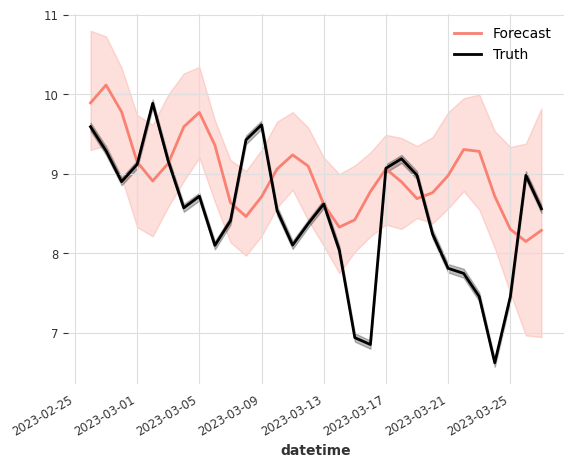

In [69]:
df = pd.read_csv("trash.csv")
times = pd.to_datetime(df["datetime"])
times = pd.DatetimeIndex(times)
values = df.loc[:, df.columns!="datetime"].to_numpy().reshape((block_rnn_forecaster.forecast_horizon, 1, -1))
direct_predictions_ts = TimeSeries.from_times_and_values(times, 
                                                         values, 
                                                         fill_missing_dates=True, freq="D")

plt.clf()
direct_predictions_ts.plot(color="salmon", label="Forecast")
block_rnn_forecaster.validation_set[:block_rnn_forecaster.forecast_horizon].plot(color="black", label="Truth")
plt.show()

In [70]:
block_rnn_forecaster.get_historicals_and_residuals()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), us

Testing NBEATS

In [44]:
nbeats_forecaster = BaseForecaster(model="NBEATS",
                                      input_csv_name="targets.csv.gz",
                                      target_variable_column_name="oxygen",
                                      datetime_column_name="datetime",
                                      covariates_names=["air_tmp", "chla", "temperature"],
                                      output_csv_name="trash_NBEATS.csv",
                                      validation_split_date="2023-02-26",
                                      model_hyperparameters={'input_chunk_length': 180,
                                                            },
                                     forecast_horizon=30,
                                     site_id="ARIK")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

Failed to make a GP fit on air_tmp
Failed to make a GP fit on chla


In [45]:
nbeats_forecaster.make_forecasts()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


{'input_chunk_length': 180}


`Trainer.fit` stopped: `max_epochs=500` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


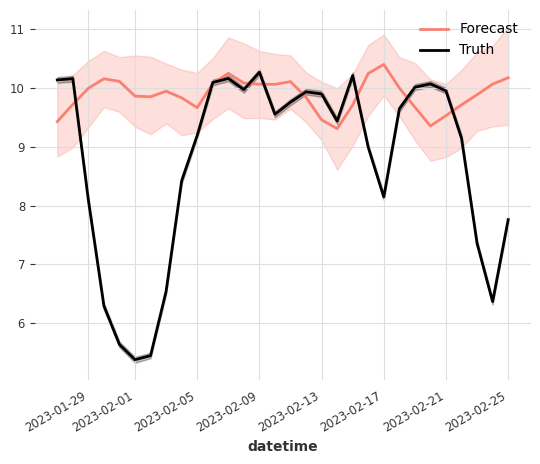

In [46]:
df = pd.read_csv("trash_NBEATS.csv")
times = pd.to_datetime(df["datetime"])
times = pd.DatetimeIndex(times)
values = df.loc[:, df.columns!="datetime"].to_numpy().reshape((block_rnn_forecaster.forecast_horizon, 1, -1))
direct_predictions_ts = TimeSeries.from_times_and_values(times, 
                                                         values, 
                                                         fill_missing_dates=True, freq="D")

plt.clf()
direct_predictions_ts.plot(color="salmon", label="Forecast")
block_rnn_forecaster.validation_set[:block_rnn_forecaster.forecast_horizon].plot(color="black", label="Truth")
plt.show()

And N-Linear

In [47]:
nlinear_forecaster = BaseForecaster(model="NLinear",
                                      input_csv_name="targets.csv.gz",
                                      target_variable_column_name="oxygen",
                                      datetime_column_name="datetime",
                                      covariates_names=["air_tmp", "chla", "temperature"],
                                      output_csv_name="trash_NLinear.csv",
                                      validation_split_date="2023-02-26",
                                      model_hyperparameters={'input_chunk_length': 180,
                                                            },
                                     forecast_horizon=30,
                                     site_id="ARIK")

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

Failed to make a GP fit on air_tmp
Failed to make a GP fit on chla


In [48]:
nlinear_forecaster.make_forecasts()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


{'input_chunk_length': 180}


`Trainer.fit` stopped: `max_epochs=500` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


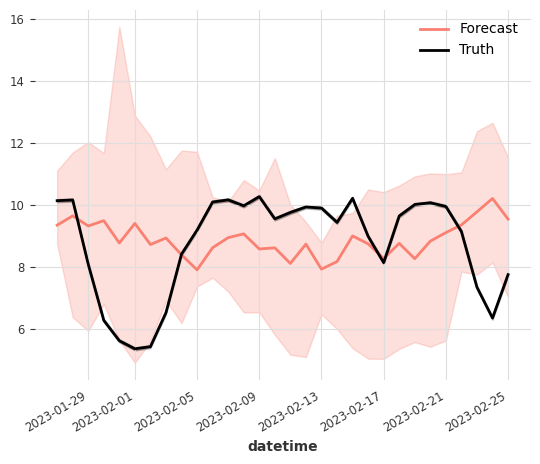

In [49]:
df = pd.read_csv("trash_NLinear.csv")
times = pd.to_datetime(df["datetime"])
times = pd.DatetimeIndex(times)
values = df.loc[:, df.columns!="datetime"].to_numpy().reshape((block_rnn_forecaster.forecast_horizon, 1, -1))
direct_predictions_ts = TimeSeries.from_times_and_values(times, 
                                                         values, 
                                                         fill_missing_dates=True, freq="D")

plt.clf()
direct_predictions_ts.plot(color="salmon", label="Forecast")
block_rnn_forecaster.validation_set[:block_rnn_forecaster.forecast_horizon].plot(color="black", label="Truth")
plt.show()

In [51]:
def read_csv(csv_filename):
    df = pd.read_csv(csv_filename)
    times = pd.to_datetime(df["datetime"])
    times = pd.DatetimeIndex(times)
    values = df.loc[:, df.columns!="datetime"].to_numpy().reshape((block_rnn_forecaster.forecast_horizon, 1, -1))
    direct_predictions_ts = TimeSeries.from_times_and_values(times, 
                                                             values, 
                                                             fill_missing_dates=True, freq="D")

    return direct_predictions_ts

In [52]:
block_rnn_preds = read_csv("trash.csv")
NBEATS_preds = read_csv("trash_NBEATS.csv")
NLinear_preds = read_csv("trash_NLinear.csv")

for preds in [block_rnn_preds, NBEATS_preds, NLinear_preds]:
    smapes = smape(block_rnn_forecaster.validation_set[:block_rnn_forecaster.forecast_horizon],
              preds,
              n_jobs=-1, 
              verbose=False)
    print(np.mean(smapes))

15.486643966411945
16.796052857085364
18.593433992310956


Now will try residual correction to see if that leads to better forecasts

In [53]:
for forecaster in [block_rnn_forecaster, nlinear_forecaster, nbeats_forecaster]:
    forecaster.get_historicals_and_residuals()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
GPU available: True (cuda), us

In [54]:
# Lets add residual samples to median forecast! then check the smape of that

In [58]:
residual_forecasters = {}
forecasters = {"block": block_rnn_forecaster, "nlinear": nlinear_forecaster, "nbeats": nbeats_forecaster}
for name, object in forecasters.items():
    residual_forecaster = ResidualForecasterDarts(
        historical_forecasts=object.historical_forecasts,
        historical_ground_truth=object.historical_ground_truth,
        covariates=object.covariates,
        validation_split_date="2022-12-28",
        output_csv_name = f"{name}_residual_forecaster.csv",
        forecast_horizon=7
    )
    residual_forecaster.make_residual_forecasts()
    residual_forecasters[name] = residual_forecaster
    

{'input_chunk_length': 180}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
`Trainer.fit` stopped: `max_epochs=500` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


{'input_chunk_length': 180}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
`Trainer.fit` stopped: `max_epochs=500` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


{'input_chunk_length': 180}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
`Trainer.fit` stopped: `max_epochs=500` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


In [91]:
start_date = pd.Timestamp(year=2022, month=12, day=28)
end_date = pd.Timestamp(year=2023, month=1, day=3)
historical_forecast = block_rnn_forecaster.historical_forecasts.slice(start_date, end_date)
historical_ground_truth = block_rnn_forecaster.historical_ground_truth.slice(start_date, end_date)

In [78]:
direct_csv_names = {"block": "trash.csv", "nlinear": "trash_NLinear.csv", "nbeats": "trash_NBEATS.csv"}
direct_predictions = {}

for name, csv in direct_csv_names.items():
    df = pd.read_csv(f"{csv}")
    times = pd.to_datetime(df["datetime"])
    times = pd.DatetimeIndex(times)
    values = df.loc[:, df.columns!="datetime"].to_numpy().reshape((forecasters[name].forecast_horizon, 1, -1))
    direct_predictions_ts = TimeSeries.from_times_and_values(times, 
                                                             values, 
                                                             fill_missing_dates=True, freq="D")
    direct_predictions[name] = direct_predictions_ts

In [79]:
def stack_ts(timeseries, n_samples=500):
    output = timeseries.copy()
    for i in range(n_samples-1):
        output = output.concatenate(timeseries, axis=2)
    return output

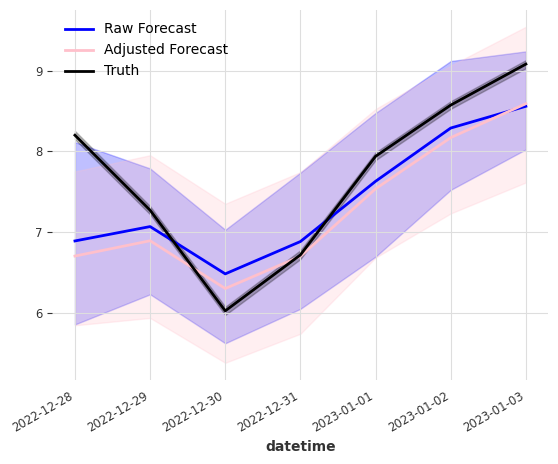

In [92]:
df = pd.read_csv("block_residual_forecaster.csv")
times = pd.to_datetime(df["datetime"])
times = pd.DatetimeIndex(times)
values = df.loc[:, df.columns!="datetime"].to_numpy().reshape((residual_forecasters["block"].forecast_horizon, 1, -1))
residuals = TimeSeries.from_times_and_values(times, 
                                             values, 
                                             fill_missing_dates=True, freq="D")
medians = stack_ts(historical_forecast.quantile_timeseries(0.5))
plt.clf()
historical_forecast.plot(color="blue", label="Raw Forecast")
(medians+residuals).plot(color="pink", label="Adjusted Forecast")
historical_ground_truth.plot(color="black", label="Truth")
plt.show()